In [1]:
import xarray as xr

# Load the NetCDF file
file_path = "datos/Land_and_Ocean_EqualArea.nc"
data = xr.open_dataset(file_path)

# Display the structure of the dataset
data_structure = data.info()
data_structure


xarray.Dataset {
dimensions:
	map_points = 15984 ;
	time = 2089 ;
	month_number = 12 ;

variables:
	float32 longitude(map_points) ;
		longitude:units = degrees_east ;
		longitude:standard_name = longitude ;
		longitude:long_name = Longitude ;
	float32 latitude(map_points) ;
		latitude:units = degrees_north ;
		latitude:standard_name = latitude ;
		latitude:long_name = Latitude ;
	float64 time(time) ;
		time:units = year A.D. ;
		time:standard_name = time ;
		time:long_name = Time ;
	float64 land_mask(map_points) ;
		land_mask:units = none ;
		land_mask:standard_name = land_mask ;
		land_mask:long_name = Land Mask ;
		land_mask:valid_min = 0.0 ;
		land_mask:valid_max = 1.0 ;
	float32 temperature(time, map_points) ;
		temperature:units = degree C ;
		temperature:standard_name = surface_temperature_anomaly ;
		temperature:long_name = Air Surface Temperature Anomaly ;
		temperature:valid_min = -17.581396970370164 ;
		temperature:valid_max = 23.203125874201458 ;
	float32 climatology(month_n

In [2]:
import numpy as np
from scipy.ndimage import gaussian_filter

# Extract latitude, longitude, and temperature data
latitudes = data['latitude'].values
longitudes = data['longitude'].values
temperature = data['temperature'].values

# Reshape the data to a grid-like structure for convolution
# Assume that map_points can be structured into a grid, if not, interpolation might be required

# Applying a Gaussian filter (convolution) to the temperature data
# The sigma value determines the amount of smoothing
temperature_smoothed = gaussian_filter(temperature, sigma=1, mode='nearest')

# Example: Checking the shape of the smoothed data and the first few values
temperature_smoothed_shape = temperature_smoothed.shape
temperature_smoothed_sample = temperature_smoothed[0, :5]

temperature_smoothed_shape, temperature_smoothed_sample


((2089, 15984), array([nan, nan, nan, nan, nan], dtype=float32))

In [3]:
import numpy as np

# Load the NumPy array from the file
correlation_matrix = np.load("decade_correlations/correlation_matrix_2010.npy")

# Count the non-null (non-NaN) values
non_null_count = np.count_nonzero(~np.isnan(correlation_matrix))

print(f"Number of non-null values: {non_null_count}")

Number of non-null values: 94187025


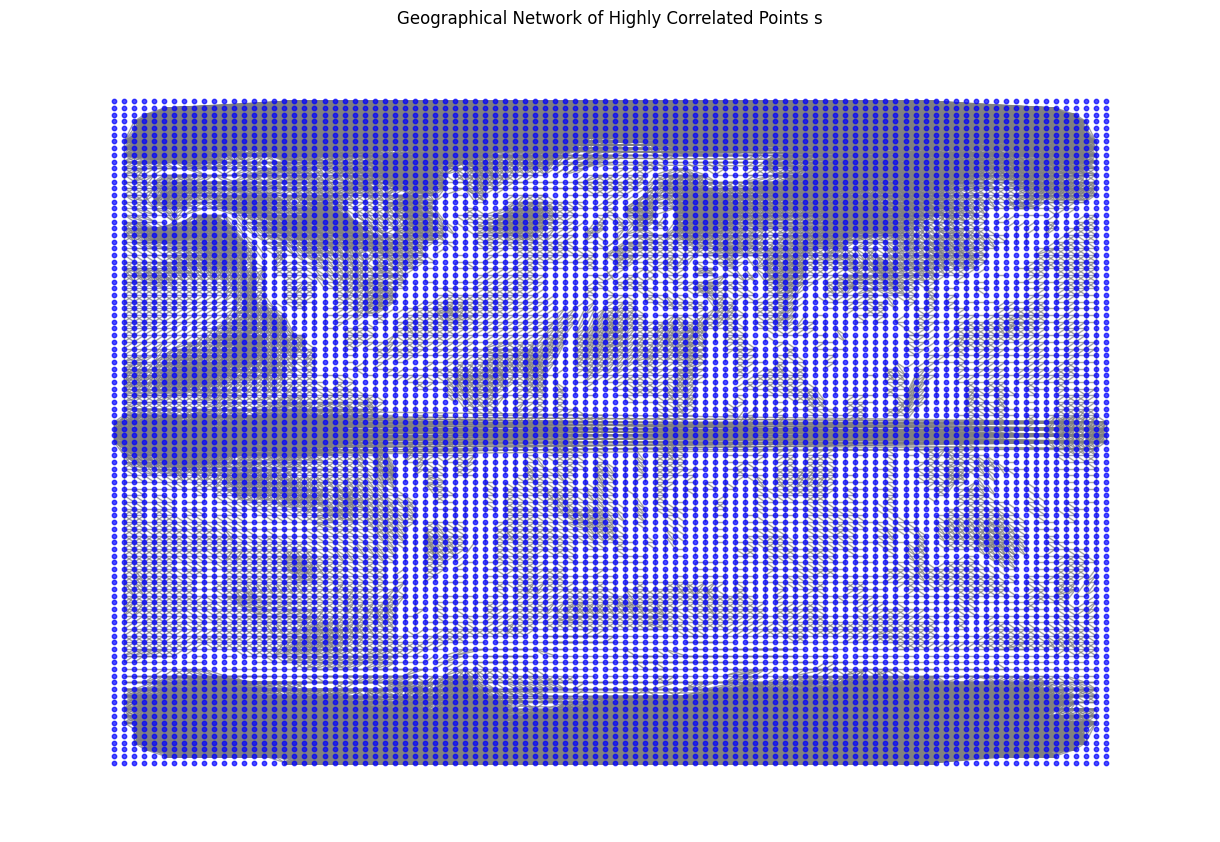

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Definir umbral de correlación significativa
correlation_threshold = 0.9

# Función para crear y visualizar la red con posiciones geográficas
def create_and_plot_geographical_network(corr_matrix, latitudes, longitudes, title):
    # Crear un grafo vacío
    G = nx.Graph()
    
    # Añadir nodos (uno por cada punto en la cuadrícula)
    num_points = corr_matrix.shape[0]
    G.add_nodes_from(range(num_points))
    
    # Añadir enlaces (aristas) para correlaciones significativas
    for i in range(num_points):
        for j in range(i+1, num_points):
            if corr_matrix[i, j] > correlation_threshold:
                G.add_edge(i, j, weight=corr_matrix[i, j])
    
    # Crear un diccionario de posiciones basado en las coordenadas geográficas
    pos = {i: (longitudes[i], latitudes[i]) for i in range(num_points)}
    
    # Dibujar la red
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=False, node_size=10, node_color='blue', edge_color='gray', alpha=0.7)
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Obtener las coordenadas geográficas interpoladas
# Interpolamos una vez para la primera y última década para obtener las posiciones en la cuadrícula
lat_grid = np.linspace(latitudes.min(), latitudes.max(), 100)
lon_grid = np.linspace(longitudes.min(), longitudes.max(), 100)
lon_grid_mesh, lat_grid_mesh = np.meshgrid(lon_grid, lat_grid)

# Flatten the grid to match the structure of the correlation matrices
flat_latitudes = lat_grid_mesh.flatten()
flat_longitudes = lon_grid_mesh.flatten()

# Red para la última década
create_and_plot_geographical_network(correlation_matrix, flat_latitudes, flat_longitudes, f"Geographical Network of Highly Correlated Points s")
